# Creating and Backtesting Bollinger-Bands Strategy 

## Getting the Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [5]:
data = pd.read_csv("../csv_files_example/eurusd.csv", parse_dates = ["Date"], index_col = "Date") # Indicate the file

In [6]:
data

,price
Date,
2004-01-01,1.258194
2004-01-02,1.258194
2004-01-05,1.268698
2004-01-06,1.272103
2004-01-07,1.264095
...,...
2020-06-24,1.131235
2020-06-25,1.125087
2020-06-26,1.122208


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4275 entries, 2004-01-01 to 2020-06-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   4275 non-null   float64
dtypes: float64(1)
memory usage: 66.8 KB


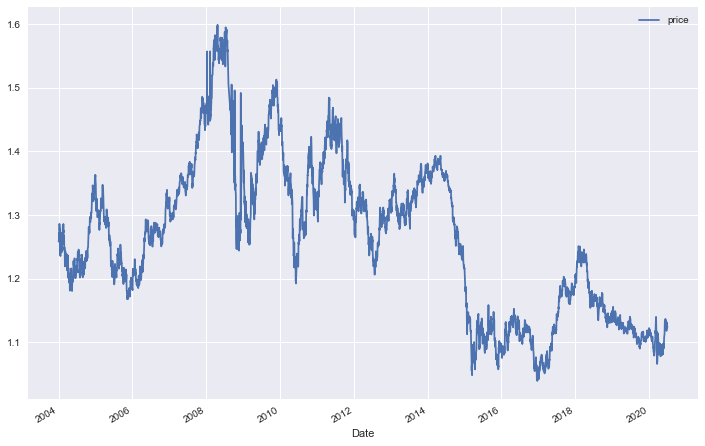

In [8]:
data.plot(figsize = (12, 8))
plt.show()

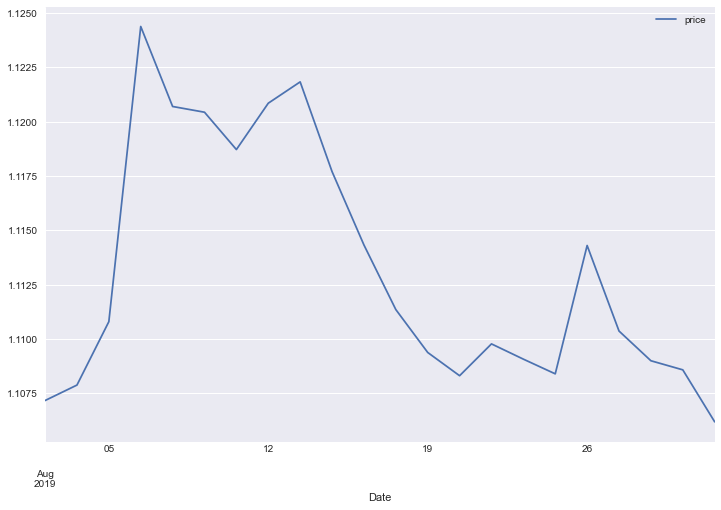

In [9]:
data.loc["2019-08"].plot(figsize = (12, 8))
plt.show()

In [10]:
data["returns"] = np.log(data.div(data.shift(1)))

In [11]:
data

,price,returns
Date,,
2004-01-01,1.258194,NaN
2004-01-02,1.258194,0.000000
2004-01-05,1.268698,0.008313
2004-01-06,1.272103,0.002681
2004-01-07,1.264095,-0.006315
...,...,...
2020-06-24,1.131235,0.002892
2020-06-25,1.125087,-0.005449
2020-06-26,1.122208,-0.002562


## Defining the Bollinger-Bands Strategy

__Bollinger Bands__: Consists of a SMA (e.g. 30) and Upper and Lower Bands +- (2) Std Dev away from SMA.

In [12]:
SMA = 30
dev = 2

In [13]:
data["SMA"] = data["price"].rolling(SMA).mean()

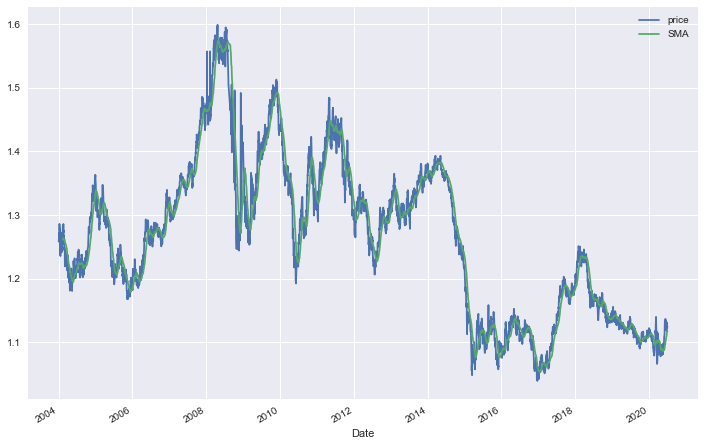

In [14]:
data[["price", "SMA"]].plot(figsize = (12, 8))
plt.show()

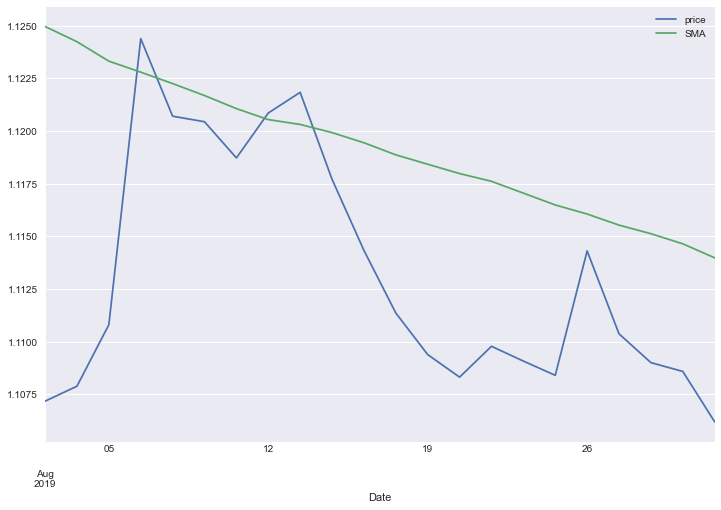

In [15]:
data.loc["2019-08", ["price", "SMA"]].plot(figsize = (12, 8))
plt.show()

In [16]:
data["price"].rolling(SMA).std()

Date
2004-01-01         NaN
2004-01-02         NaN
2004-01-05         NaN
2004-01-06         NaN
2004-01-07         NaN
                ...   
2020-06-24    0.018302
2020-06-25    0.017503
2020-06-26    0.016372
2020-06-29    0.015147
2020-06-30    0.014425
Name: price, Length: 4275, dtype: float64

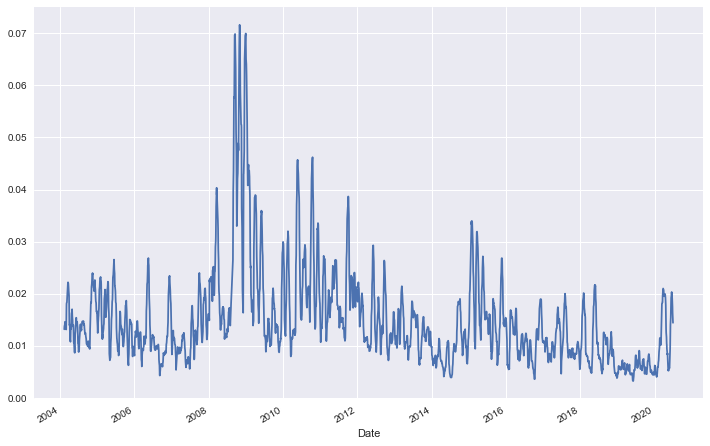

In [17]:
data["price"].rolling(SMA).std().plot(figsize = (12, 8 ))
plt.show()

In [18]:
data["Lower"] = data["SMA"] - data["price"].rolling(SMA).std() * dev # Lower Band -2 Std Dev

In [19]:
data["Upper"] = data["SMA"] + data["price"].rolling(SMA).std() * dev # Upper Band -2 Std Dev

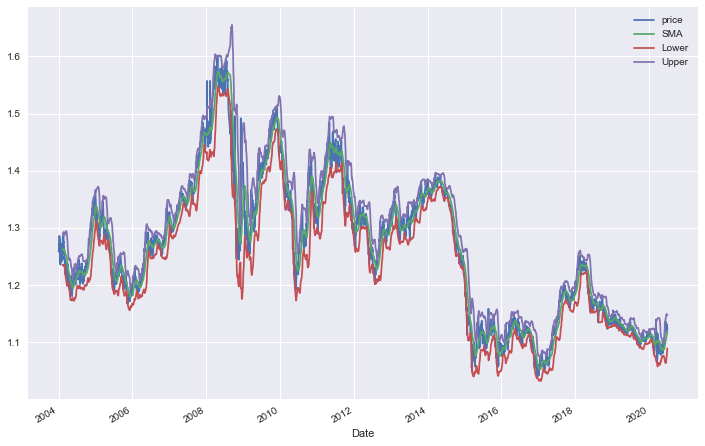

In [20]:
data.drop(columns = "returns").plot(figsize = (12, 8))
plt.show()

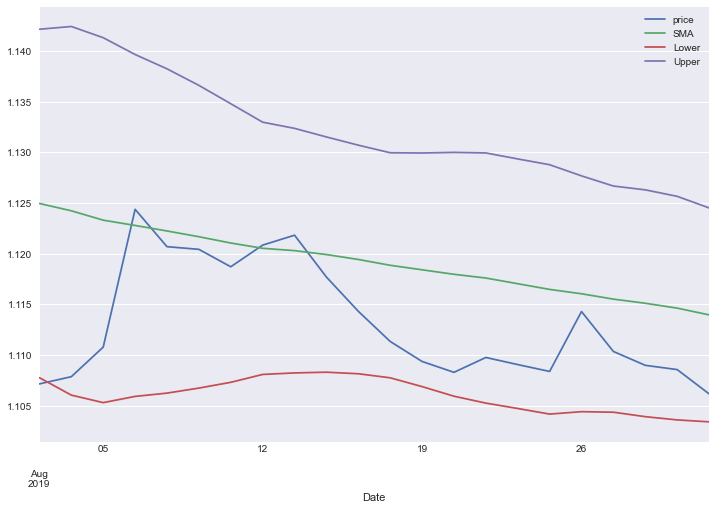

In [21]:
data.drop(columns = "returns").loc["2019-08"].plot(figsize = (12, 8))
plt.show()

In [22]:
data.dropna(inplace = True)

In [23]:
data

,price,returns,SMA,Lower,Upper
Date,,,,,
2004-02-11,1.283005,0.011367,1.261227,1.234875,1.287578
2004-02-12,1.281805,-0.000936,1.262014,1.234646,1.289381
2004-02-13,1.272799,-0.007051,1.262501,1.234896,1.290105
2004-02-16,1.276503,0.002906,1.262761,1.234770,1.290752
2004-02-17,1.285793,0.007251,1.263217,1.234169,1.292265
...,...,...,...,...,...
2020-06-24,1.131235,0.002892,1.112723,1.076119,1.149327
2020-06-25,1.125087,-0.005449,1.114147,1.079140,1.149153
2020-06-26,1.122208,-0.002562,1.115530,1.082786,1.148274


In [24]:
data["distance"] = data.price - data.SMA # helper Column

In [25]:
data["position"] = np.where(data.price < data.Lower, 1, np.nan) # 1. oversold -> go long

In [26]:
data["position"] = np.where(data.price > data.Upper, -1, data["position"]) # 2. overbought -> go short

In [27]:
data

,price,returns,SMA,Lower,Upper,distance,position
Date,,,,,,,
2004-02-11,1.283005,0.011367,1.261227,1.234875,1.287578,0.021779,NaN
2004-02-12,1.281805,-0.000936,1.262014,1.234646,1.289381,0.019791,NaN
2004-02-13,1.272799,-0.007051,1.262501,1.234896,1.290105,0.010298,NaN
2004-02-16,1.276503,0.002906,1.262761,1.234770,1.290752,0.013743,NaN
2004-02-17,1.285793,0.007251,1.263217,1.234169,1.292265,0.022576,NaN
...,...,...,...,...,...,...,...
2020-06-24,1.131235,0.002892,1.112723,1.076119,1.149327,0.018512,NaN
2020-06-25,1.125087,-0.005449,1.114147,1.079140,1.149153,0.010941,NaN
2020-06-26,1.122208,-0.002562,1.115530,1.082786,1.148274,0.006678,NaN


In [28]:
# 3. crossing SMA ("Middle Band") -> go neutral
data["position"] = np.where(data.distance * data.distance.shift(1) < 0, 0, data["position"])

In [29]:
data

,price,returns,SMA,Lower,Upper,distance,position
Date,,,,,,,
2004-02-11,1.283005,0.011367,1.261227,1.234875,1.287578,0.021779,NaN
2004-02-12,1.281805,-0.000936,1.262014,1.234646,1.289381,0.019791,NaN
2004-02-13,1.272799,-0.007051,1.262501,1.234896,1.290105,0.010298,NaN
2004-02-16,1.276503,0.002906,1.262761,1.234770,1.290752,0.013743,NaN
2004-02-17,1.285793,0.007251,1.263217,1.234169,1.292265,0.022576,NaN
...,...,...,...,...,...,...,...
2020-06-24,1.131235,0.002892,1.112723,1.076119,1.149327,0.018512,NaN
2020-06-25,1.125087,-0.005449,1.114147,1.079140,1.149153,0.010941,NaN
2020-06-26,1.122208,-0.002562,1.115530,1.082786,1.148274,0.006678,NaN


In [30]:
data["position"] = data.position.ffill().fillna(0) # where 1-3 isn´t applicable -> hold previous position

In [31]:
data.position.value_counts()

 0.0    1890
-1.0    1207
 1.0    1149
Name: position, dtype: int64

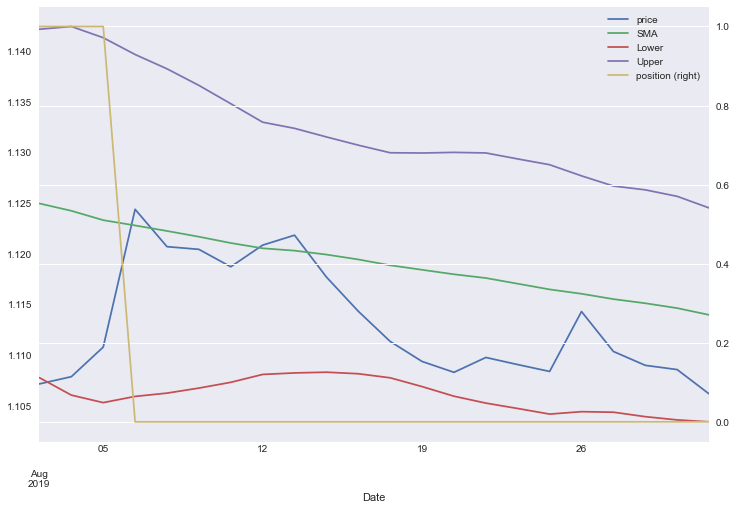

In [32]:
data.drop(columns = ["returns", "distance"]).loc["2019-08"].plot(figsize = (12, 8), secondary_y = "position")
plt.show()

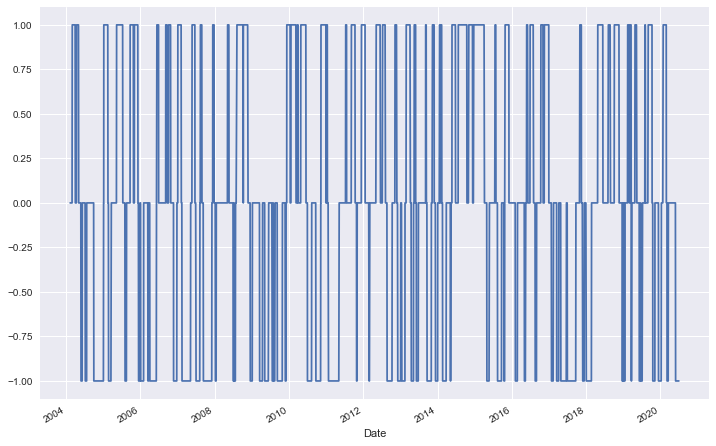

In [33]:
data.position.plot(figsize = (12, 8))
plt.show()

## Vectorized Strategy Backtesting

In [34]:
data

,price,returns,SMA,Lower,Upper,distance,position
Date,,,,,,,
2004-02-11,1.283005,0.011367,1.261227,1.234875,1.287578,0.021779,0.0
2004-02-12,1.281805,-0.000936,1.262014,1.234646,1.289381,0.019791,0.0
2004-02-13,1.272799,-0.007051,1.262501,1.234896,1.290105,0.010298,0.0
2004-02-16,1.276503,0.002906,1.262761,1.234770,1.290752,0.013743,0.0
2004-02-17,1.285793,0.007251,1.263217,1.234169,1.292265,0.022576,0.0
...,...,...,...,...,...,...,...
2020-06-24,1.131235,0.002892,1.112723,1.076119,1.149327,0.018512,-1.0
2020-06-25,1.125087,-0.005449,1.114147,1.079140,1.149153,0.010941,-1.0
2020-06-26,1.122208,-0.002562,1.115530,1.082786,1.148274,0.006678,-1.0


In [35]:
data["strategy"] = data.position.shift(1) * data["returns"]

In [36]:
data.dropna(inplace = True)

In [37]:
data

,price,returns,SMA,Lower,Upper,distance,position,strategy
Date,,,,,,,,
2004-02-12,1.281805,-0.000936,1.262014,1.234646,1.289381,0.019791,0.0,-0.000000
2004-02-13,1.272799,-0.007051,1.262501,1.234896,1.290105,0.010298,0.0,-0.000000
2004-02-16,1.276503,0.002906,1.262761,1.234770,1.290752,0.013743,0.0,0.000000
2004-02-17,1.285793,0.007251,1.263217,1.234169,1.292265,0.022576,0.0,0.000000
2004-02-18,1.272508,-0.010386,1.263498,1.234253,1.292742,0.009010,0.0,-0.000000
...,...,...,...,...,...,...,...,...
2020-06-24,1.131235,0.002892,1.112723,1.076119,1.149327,0.018512,-1.0,-0.002892
2020-06-25,1.125087,-0.005449,1.114147,1.079140,1.149153,0.010941,-1.0,0.005449
2020-06-26,1.122208,-0.002562,1.115530,1.082786,1.148274,0.006678,-1.0,0.002562


In [38]:
data["creturns"] = data["returns"].cumsum().apply(np.exp)
data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)

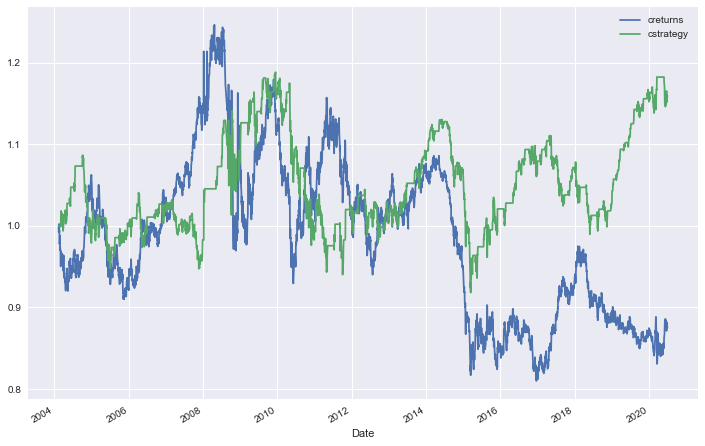

In [39]:
data[["creturns", "cstrategy"]].plot(figsize = (12 , 8))
plt.show()

In [40]:
data

,price,returns,SMA,Lower,Upper,distance,position,strategy,creturns,cstrategy
Date,,,,,,,,,,
2004-02-12,1.281805,-0.000936,1.262014,1.234646,1.289381,0.019791,0.0,-0.000000,0.999064,1.000000
2004-02-13,1.272799,-0.007051,1.262501,1.234896,1.290105,0.010298,0.0,-0.000000,0.992045,1.000000
2004-02-16,1.276503,0.002906,1.262761,1.234770,1.290752,0.013743,0.0,0.000000,0.994932,1.000000
2004-02-17,1.285793,0.007251,1.263217,1.234169,1.292265,0.022576,0.0,0.000000,1.002173,1.000000
2004-02-18,1.272508,-0.010386,1.263498,1.234253,1.292742,0.009010,0.0,-0.000000,0.991818,1.000000
...,...,...,...,...,...,...,...,...,...,...
2020-06-24,1.131235,0.002892,1.112723,1.076119,1.149327,0.018512,-1.0,-0.002892,0.881707,1.151339
2020-06-25,1.125087,-0.005449,1.114147,1.079140,1.149153,0.010941,-1.0,0.005449,0.876916,1.157629
2020-06-26,1.122208,-0.002562,1.115530,1.082786,1.148274,0.006678,-1.0,0.002562,0.874672,1.160599


In [41]:
ptc = 0.00007

In [42]:
data["trades"] = data.position.diff().fillna(0).abs()

In [43]:
data

,price,returns,SMA,Lower,Upper,distance,position,strategy,creturns,cstrategy,trades
Date,,,,,,,,,,,
2004-02-12,1.281805,-0.000936,1.262014,1.234646,1.289381,0.019791,0.0,-0.000000,0.999064,1.000000,0.0
2004-02-13,1.272799,-0.007051,1.262501,1.234896,1.290105,0.010298,0.0,-0.000000,0.992045,1.000000,0.0
2004-02-16,1.276503,0.002906,1.262761,1.234770,1.290752,0.013743,0.0,0.000000,0.994932,1.000000,0.0
2004-02-17,1.285793,0.007251,1.263217,1.234169,1.292265,0.022576,0.0,0.000000,1.002173,1.000000,0.0
2004-02-18,1.272508,-0.010386,1.263498,1.234253,1.292742,0.009010,0.0,-0.000000,0.991818,1.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2020-06-24,1.131235,0.002892,1.112723,1.076119,1.149327,0.018512,-1.0,-0.002892,0.881707,1.151339,0.0
2020-06-25,1.125087,-0.005449,1.114147,1.079140,1.149153,0.010941,-1.0,0.005449,0.876916,1.157629,0.0
2020-06-26,1.122208,-0.002562,1.115530,1.082786,1.148274,0.006678,-1.0,0.002562,0.874672,1.160599,0.0


In [44]:
data.trades.value_counts()

0.0    4020
1.0     225
Name: trades, dtype: int64

In [45]:
data["strategy_net"] = data.strategy - data.trades * ptc

In [46]:
data["cstrategy_net"] = data.strategy_net.cumsum().apply(np.exp)

In [47]:
data

,price,returns,SMA,Lower,Upper,distance,position,strategy,creturns,cstrategy,trades,strategy_net,cstrategy_net
Date,,,,,,,,,,,,,
2004-02-12,1.281805,-0.000936,1.262014,1.234646,1.289381,0.019791,0.0,-0.000000,0.999064,1.000000,0.0,-0.000000,1.000000
2004-02-13,1.272799,-0.007051,1.262501,1.234896,1.290105,0.010298,0.0,-0.000000,0.992045,1.000000,0.0,-0.000000,1.000000
2004-02-16,1.276503,0.002906,1.262761,1.234770,1.290752,0.013743,0.0,0.000000,0.994932,1.000000,0.0,0.000000,1.000000
2004-02-17,1.285793,0.007251,1.263217,1.234169,1.292265,0.022576,0.0,0.000000,1.002173,1.000000,0.0,0.000000,1.000000
2004-02-18,1.272508,-0.010386,1.263498,1.234253,1.292742,0.009010,0.0,-0.000000,0.991818,1.000000,0.0,-0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-24,1.131235,0.002892,1.112723,1.076119,1.149327,0.018512,-1.0,-0.002892,0.881707,1.151339,0.0,-0.002892,1.133347
2020-06-25,1.125087,-0.005449,1.114147,1.079140,1.149153,0.010941,-1.0,0.005449,0.876916,1.157629,0.0,0.005449,1.139539
2020-06-26,1.122208,-0.002562,1.115530,1.082786,1.148274,0.006678,-1.0,0.002562,0.874672,1.160599,0.0,0.002562,1.142463


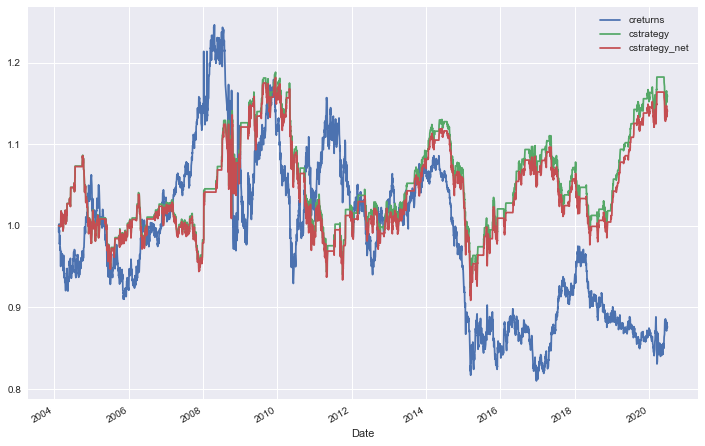

In [48]:
data[["creturns", "cstrategy", "cstrategy_net"]].plot(figsize = (12 , 8))
plt.show()

In [49]:
data[["returns", "strategy_net"]].mean() * (4 * 252) # annualized return

returns        -0.031266
strategy_net    0.031095
dtype: float64

In [50]:
data[["returns", "strategy_net"]].std() * np.sqrt(4 * 252) # annualized risk

returns         0.240874
strategy_net    0.158490
dtype: float64